In [25]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data = pd.read_csv(file_url) # 데이터셋 읽기

In [26]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [28]:
data.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [29]:
round(data.describe(),2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


## 전처리: 학습셋과 시험셋 나누기

In [30]:
X = data[['age','sex','bmi','children','smoker']] # 독립변수
y = data['charges'] # 종속변수

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=100)


## 모델링
### 선형 회귀 알고리즘

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # model 객체에 선형회귀의 속성 부여
# model.fit(독립변수, 종속변수)
model.fit(X_train, y_train)

LinearRegression()

## 모델을 사용한 예측
### 학습셋과 시험셋을 각각 사용해 오버피팅 문제를 확인

> 오버피팅(overfitting)
- 모델이 학습셋에 지나치게 잘 맞도록 학습되어서 새로운 데이터에 대한 예측력이 떨어지는 현상을 의미
- 과적합, 과학습으로 부른다.

In [49]:
pred = model.predict(X_test)

In [50]:
## 예측 모델 평가

In [51]:
comparison = pd.DataFrame({
    'actual': y_test,
    'pred': pred
})
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


<Axes: xlabel='actual', ylabel='pred'>

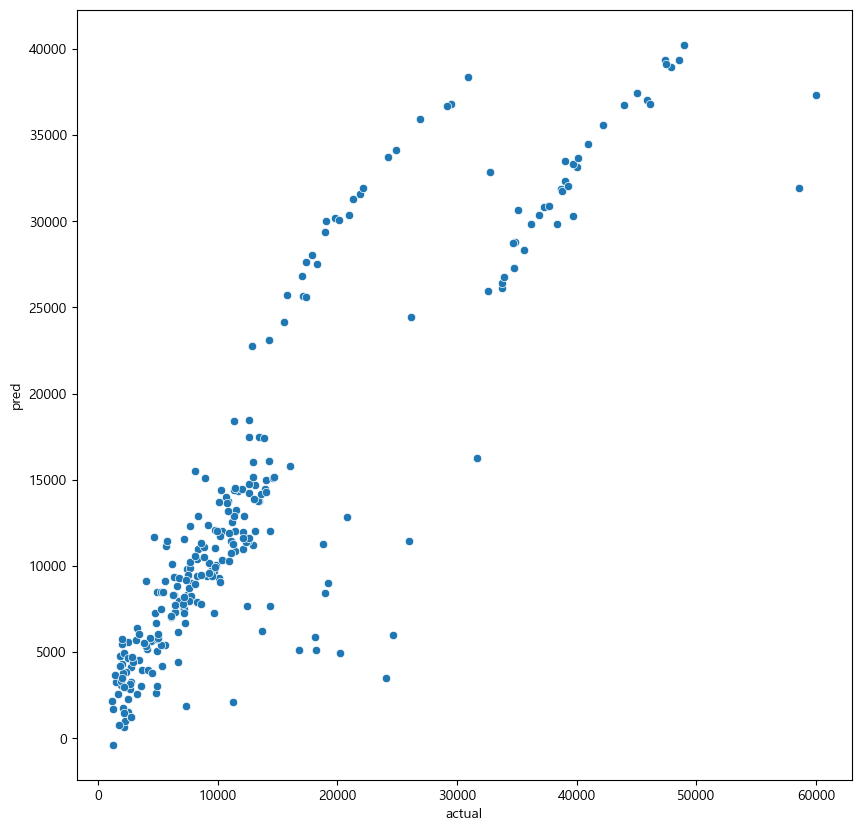

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10)) # 그래프 크기 정의
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred) ** 0.5

np.float64(5684.927776334484)

In [54]:
root_mean_squared_error(y_test, pred)

np.float64(5684.927776334484)

In [55]:
model.score(X_train, y_train)

0.7368220127747351

In [56]:
model.predict(X_train)

array([26072.17298409, 12366.82419981, 15259.54467001, ...,
       10412.98198219,  9087.36751025,  1144.98888244])